In [1]:
import numpy as np
import pandas as pd
import GPy
import datetime

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'GPy'

In [ ]:
covid19 = pd.read_csv("data/covid19.txt",sep='\t')

In [7]:
covid19.head()

,yy,mm,dd,i,d,PCR
0,2020,1,15,1,0,NaN
1,2020,1,24,2,0,NaN
2,2020,1,25,3,0,NaN
3,2020,1,26,4,0,NaN
4,2020,1,28,7,0,NaN


In [45]:
nd = covid19.shape[0]
nd

61

In [61]:
covid_days = [datetime.date(covid19["yy"][aa], covid19["mm"][aa], covid19["dd"][aa]) for aa in range(nd)]
d0 = covid_days[0]

In [177]:
ddd = np.array([(dd - d0).days for dd in covid_days])[14:nd,None]
logi = np.log(covid19.values[:,3])[14:nd,None]

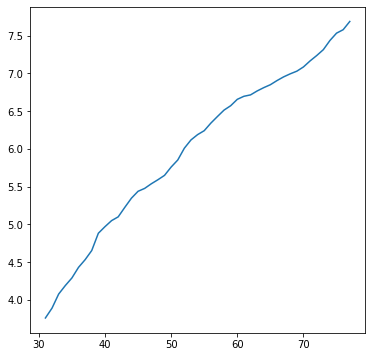

In [178]:
plt.figure(figsize=(6,6))
_ = plt.plot(ddd, logi)

In [287]:
kernel3 = GPy.kern.RBF(1)+GPy.kern.Bias(1)+GPy.kern.Linear(1)
m = GPy.models.GPRegression(ddd, logi, kernel=kernel3)

In [288]:
kernel3.rbf.lengthscale.set_prior(GPy.priors.Gamma.from_EV(30,3))
kernel3.rbf.variance.set_prior(GPy.priors.Gamma.from_EV(1,10))
kernel3.bias.variance.set_prior(GPy.priors.Gamma.from_EV(1,1))
kernel3.linear.variances.set_prior(GPy.priors.Gamma.from_EV(0.1,0.1))

reconstraining parameters GP_regression.sum.rbf.lengthscale
reconstraining parameters GP_regression.sum.rbf.variance
reconstraining parameters GP_regression.sum.bias.variance
reconstraining parameters GP_regression.sum.linear.variances


reconstraining parameters GP_regression.Gaussian_noise.variance


<Figure size 432x432 with 0 Axes>

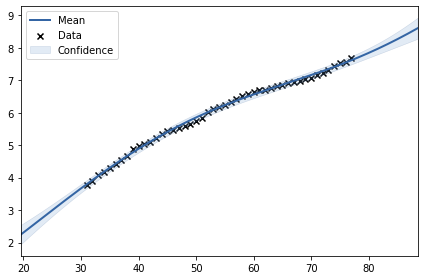

In [289]:
#m.kern.lengthscale.set_prior(GPy.priors.Gamma.from_EV(1,10))
#m.kern.variance.set_prior(GPy.priors.Gamma.from_EV(1,10))
m.likelihood.variance.set_prior(GPy.priors.Gamma(1,10))
m.optimize()
plt.figure(figsize=(6,6))
_=m.plot()

In [290]:
m

GP_regression.,value,constraints,priors
sum.rbf.variance,0.7171391167779688,+ve,"Ga(0.1, 0.1)"
sum.rbf.lengthscale,29.683411954928253,+ve,"Ga(3e+02, 10)"
sum.bias.variance,0.5787845546193313,+ve,"Ga(1, 1)"
sum.linear.variances,0.012863100722180302,+ve,"Ga(0.1, 1)"
Gaussian_noise.variance,0.003194828571259968,+ve,"Ga(1, 10)"


In [283]:
? GPy.priors.Gamma.from_EV

In [107]:
m = GPy.models.GPRegression(x,y)

In [109]:
x.shape

(100, 1)